In [47]:
from pathlib import Path

import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.default = 'png'

from eval import read_data

import duckdb

In [2]:
runfile = "../../masterthesis-data/20240409_074752.db"

In [3]:
conn, logs, algorithms, datasets, imbalance_types, imbalance_values, penalties = read_data(Path(runfile))

# FedProx

In [49]:
fedprox = conn.sql("""
    PIVOT 
    (SELECT round, stage, variable, penalty, imbalance_value, avg(value) AS avg_value FROM logs
    WHERE
        dataset = 'cifar10'
        AND imbalance_type = 'label_distribution'
        AND algorithm IN ('FedProx', 'FedAvg')
    GROUP BY round, variable, stage, penalty, imbalance_value)
    ON variable
    USING first(avg_value)
    ORDER BY round, penalty
""")
fedprox_train = conn.sql("SELECT * FROM fedprox WHERE stage = 'train'").df()
fedprox_test = conn.sql("SELECT * FROM fedprox WHERE stage = 'test'").df()

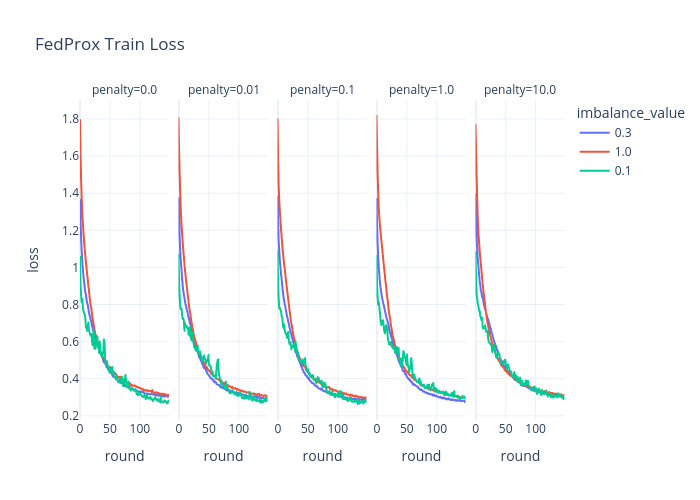

In [54]:
px.line(fedprox_train, x="round", y="loss", color="imbalance_value", facet_col="penalty", title="FedProx Train Loss")

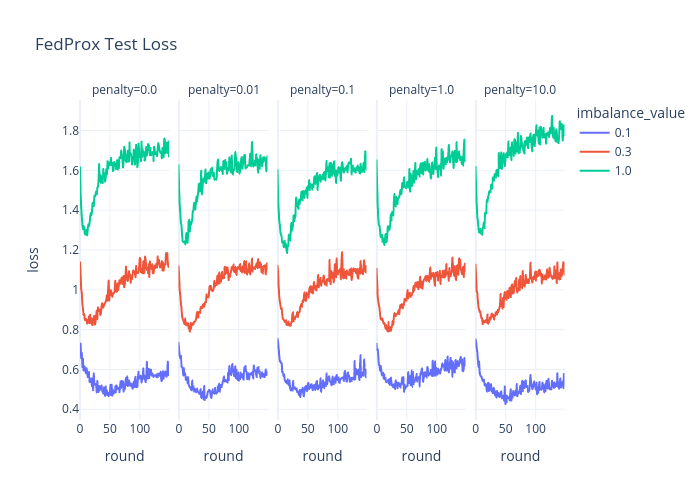

In [57]:
px.line(fedprox_test, x="round", y="loss", color="imbalance_value", facet_col="penalty", title="FedProx Test Loss")

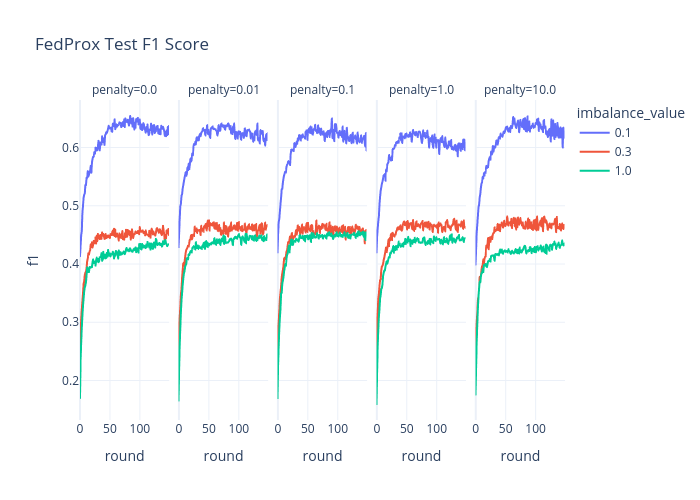

In [55]:
px.line(fedprox_test, x="round", y="f1", color="imbalance_value", facet_col="penalty", title="FedProx Test F1 Score")